In [30]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [ ]:
quandl.ApiConfig.api_key = 'LMQHbmGJsqHS-xH6wRvB'


df = quandl.get("WIKI/AAPL")
df = df[["Adj. Close"]]
df

In [ ]:
df["Adj. Close"].plot(figsize=(15,6), color = 'g')
plt.legend(loc = 'upper left')
plt.show

In [23]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)


X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print(confidence)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

0.9866371835967536
[1499.34386097 1538.16220246 1549.53999221 1535.65505178 1556.54089179
 1572.01936019 1573.97408784 1590.16433208 1613.48295813 1602.89130885
 1603.39061428 1583.20592659 1590.42992008 1615.24646242 1630.15126076
 1637.97017136 1645.25790597 1673.9732801  1694.68914379 1683.84253003
 1686.83836263 1677.61714741 1666.3137223  1637.89580672 1682.06840222
 1677.12846549 1637.01405458 1585.44748927 1649.50731391 1587.03039373]


(736445.0, 737192.5)

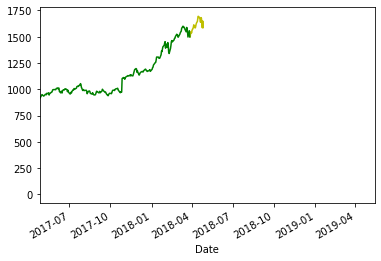

In [28]:
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color = 'y')
df['Adj. Close'].plot(color = 'g')

plt.xlim(xmin = datetime.date(2017,4,26))